<a href="https://colab.research.google.com/github/mifm/examples/blob/master/min_max_spacing_constraint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%%capture
!pip install topfarm

In [7]:
from topfarm.cost_models.dummy import DummyCost, DummyCostPlotComp
from topfarm.constraint_components.spacing import SpacingConstraint
from topfarm.constraint_components.boundary import XYBoundaryConstraint
from topfarm.easy_drivers import EasyScipyOptimizeDriver
from topfarm import TopFarmProblem
import numpy as np

In [4]:
class MinMaxSpacingConstraint(SpacingConstraint):
    def __init__(self, min_spacing, max_spacing):
        self.max_spacing = max_spacing
        SpacingConstraint.__init__(self, min_spacing)

    def setup_as_constraint(self, problem):
        self._setup(problem)
        problem.model.add_constraint('wtSeparationSquared', lower=self.min_spacing**2, upper=self.max_spacing**2)

INFO: checking out_of_order


INFO:check_config:checking out_of_order


INFO: checking system


INFO:check_config:checking system


INFO: checking solvers


INFO:check_config:checking solvers


INFO: checking dup_inputs


INFO:check_config:checking dup_inputs


INFO: checking missing_recorders


INFO:check_config:checking missing_recorders


INFO: checking unserializable_options


INFO:check_config:checking unserializable_options


INFO: checking comp_has_no_outputs


INFO:check_config:checking comp_has_no_outputs


INFO: checking auto_ivc_warnings


INFO:check_config:checking auto_ivc_warnings


INFO: checking out_of_order


INFO:check_config:checking out_of_order


INFO: checking system


INFO:check_config:checking system


INFO: checking solvers


INFO:check_config:checking solvers


INFO: checking dup_inputs


INFO:check_config:checking dup_inputs


INFO: checking missing_recorders


INFO:check_config:checking missing_recorders


INFO: checking unserializable_options


INFO:check_config:checking unserializable_options


INFO: checking comp_has_no_outputs


INFO:check_config:checking comp_has_no_outputs


INFO: checking auto_ivc_warnings


INFO:check_config:checking auto_ivc_warnings


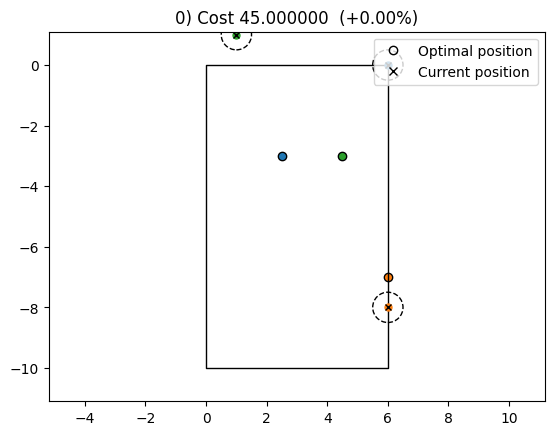

Optimization terminated successfully    (Exit mode 0)
            Current function value: 9.345746097650498
            Iterations: 11
            Function evaluations: 11
            Gradient evaluations: 11
Optimization Complete
-----------------------------------


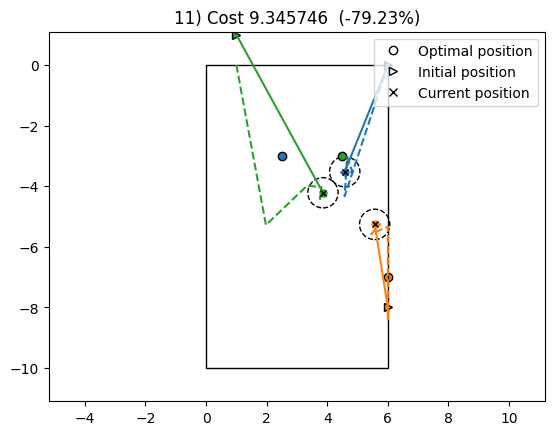

In [5]:
initial = np.array([[6, 0], [6, -8], [1, 1]])  # initial turbine layouts
optimal = np.array([[2.5, -3], [6, -7], [4.5, -3]])  # optimal turbine layouts
boundary = np.array([(0, 0), (6, 0), (6, -10), (0, -10)])  # turbine boundaries
desired = np.array([[3, -3], [7, -7], [4, -3]])  # desired turbine layouts
drivers = [EasyScipyOptimizeDriver()]
plot_comp = DummyCostPlotComp(optimal)
tf = TopFarmProblem(
    design_vars=dict(zip('xy', initial.T)),
    cost_comp=DummyCost(optimal_state=desired, inputs=['x', 'y']),
    constraints=[XYBoundaryConstraint(boundary),
                 MinMaxSpacingConstraint(1, 2),
                 ],
    driver=drivers[0],
    plot_comp=plot_comp
)
cost, _, recorder = tf.optimize()
plot_comp.show()
